In [ ]:
!pip install face_recognition

[128]: [-1.14578821e-01  8.27563480e-02  2.61257254e-02 -5.83898164e-02
 -1.75547495e-01  7.62083381e-03 -8.98971632e-02 -3.97309735e-02
  1.55587703e-01 -1.49469823e-01  1.73299789e-01 -6.54513761e-02
 -2.19802573e-01 -1.79020092e-02 -6.21570870e-02  2.17358172e-01
 -1.67115554e-01 -2.07054898e-01  6.32639043e-03  1.86132304e-02
  7.25180954e-02  5.70140406e-02 -3.81072089e-02  9.32224467e-03
 -1.28377333e-01 -3.33441556e-01 -8.91660750e-02 -7.88099319e-03
 -5.99493980e-02 -6.35437816e-02 -2.09169518e-02  7.64134079e-02
 -1.60940051e-01  3.31073813e-03  1.04241222e-01  1.38982728e-01
 -6.27681799e-03 -9.61199552e-02  1.26741767e-01 -2.46405024e-02
 -3.29541713e-01  2.33362094e-02  1.06978387e-01  2.31692895e-01
  1.66915447e-01  3.24175693e-04 -4.84719649e-02 -1.34519935e-01
  1.33673579e-01 -1.78379923e-01  5.82496040e-02  1.68834627e-01
  1.07913621e-01  5.12509756e-02  3.63468081e-02 -1.44770309e-01
  1.59168690e-02  1.29255384e-01 -1.08565673e-01 -4.58891615e-02
  8.59613568e-02 -

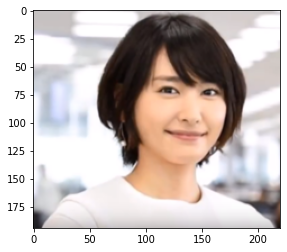

In [5]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("新垣結衣.webp")
en = face_recognition.face_encodings(img)[0]
print("[128]:", en)
plt.imshow(img)

In [8]:
import glob
allows = ["jpg", "jpeg", "png", "webp"]
fns = []
for sub in allows:
    fns = fns + glob.glob("*.{}".format(sub))
names, encodings = [], []
for fn in fns:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    name = fn.split(".")[0]
    names.append(name)
print(names)
# print(encodings)

['蔡英文', '韓國瑜', '阿信', '新垣結衣']


網址:https://s.yimg.com/ny/api/res/1.2/lhFyAxa4hqM1K.yiApN37A--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTgwNC42NzgzNjI1NzMwOTk0/https://media.zenfs.com/en/ebc.net.tw/9261b9629afe8c1813523a8e156517f7


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 蔡英文 的距離是: 0.6171844362177304
跟 韓國瑜 的距離是: 0.6424870667124407
跟 阿信 的距離是: 0.5459967436396747
跟 新垣結衣 的距離是: 0.4069975547039156
這個最像: 新垣結衣
跟 蔡英文 的距離是: 0.7014594390214385
跟 韓國瑜 的距離是: 0.7736735900672249
跟 阿信 的距離是: 0.7989114011322217
跟 新垣結衣 的距離是: 0.7664608224658477
這個最像: 蔡英文


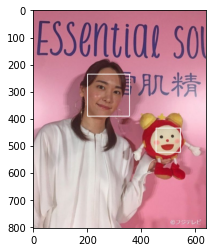

In [12]:
import requests
import cv2
url = input("網址:")
# stream: 檔案方式開啟 verify: prevent SSL fail
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    # 圖片, 左上, 右下, BGR, 粗細(px)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    # argmin: 找最小值的index
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)